In [ ]:
"""
In this project, he provided the neural network with images of handwritten
digits from the MNIST dataset, which contains 60,000 images for training and
10,000 for testing, each with a corresponding label (0 to 9) indicating the
digit represented. . The images are 28x28 grayscale pixel matrices, normalized
to have values ​​between 0 and 1. We train the network using these images and
labels, which involves adjusting the network weights through an iterative
backpropagation process, optimized with the algorithm Adam and evaluated with
categorical cross entropy loss. When you turn on the network
(perform inference), it processes new images of digits, passing the data
through the trained layers to predict the corresponding label (digit) with a
certain probability for each possible digit (0-9).
"""

In [33]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt

# Print TensorFlow version to ensure it's installed correctly
print(f"TensorFlow version: {tf.__version__}")

TensorFlow version: 2.15.0


In [34]:
# Load the MNIST dataset from Keras
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the pixel values to be between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}, y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}, y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28), y_train shape: (60000,)
x_test shape: (10000, 28, 28), y_test shape: (10000,)


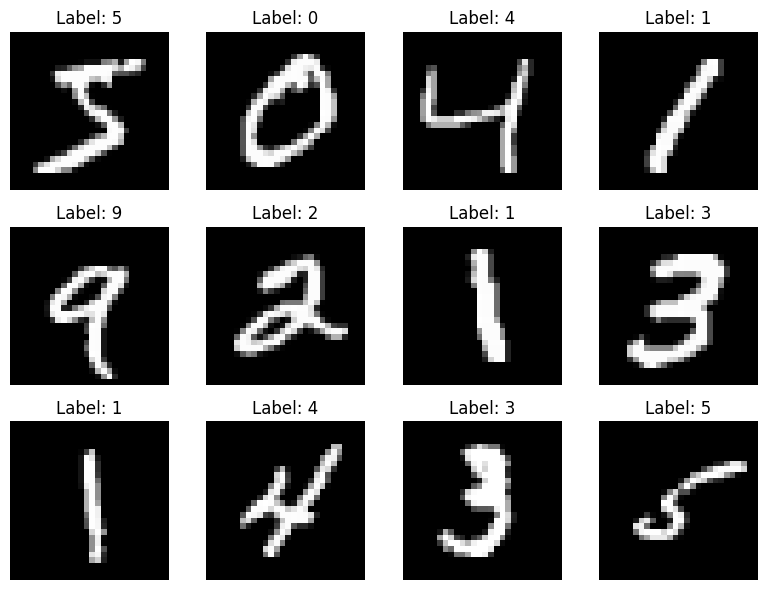

In [35]:
# Function to plot a grid of images
def plot_images(images, labels, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(num_cols*2, num_rows*2))
    for i in range(num_rows * num_cols):
        ax = axes[i // num_cols, i % num_cols]
        ax.imshow(images[i], cmap='gray')
        ax.set_title(f"Label: {labels[i]}")
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Plot the first 12 images from the training set
plot_images(x_train, y_train, 3, 4)

In [36]:
# Build the neural network model
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),  # Flatten the 28x28 images into 1D vectors of size 784
    layers.Dense(128, activation='relu'),  # Hidden layer with 128 neurons and ReLU activation
    layers.Dense(10, activation='softmax')  # Output layer with 10 neurons (one for each digit) and softmax activation
])

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_3 (Flatten)         (None, 784)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               100480    
                                                                 
 dense_7 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [38]:
# Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 6s 3ms/step - loss: 0.2731 - accuracy: 0.9221 - val_loss: 0.1312 - val_accuracy: 0.9622
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1217 - accuracy: 0.9644 - val_loss: 0.0935 - val_accuracy: 0.9737
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0830 - accuracy: 0.9747 - val_loss: 0.0796 - val_accuracy: 0.9768
Epoch 4/5
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0632 - accuracy: 0.9805 - val_loss: 0.0770 - val_accuracy: 0.9775
Epoch 5/5
1688/1688 [==============================] - 9s 5ms/step - loss: 0.0486 - accuracy: 0.9854 - val_loss: 0.0728 - val_accuracy: 0.9768


In [39]:
# Evaluate the model on the test data
test_loss, test_acc = model.evaluate(x_test, y_test)

print(f"\nTest accuracy: {test_acc:.4f}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0789 - accuracy: 0.9757

Test accuracy: 0.9757


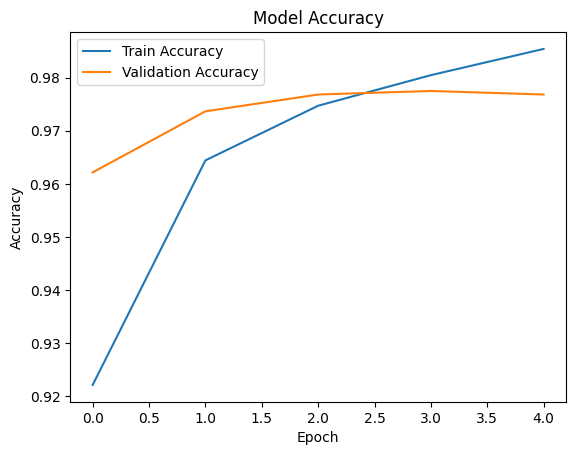

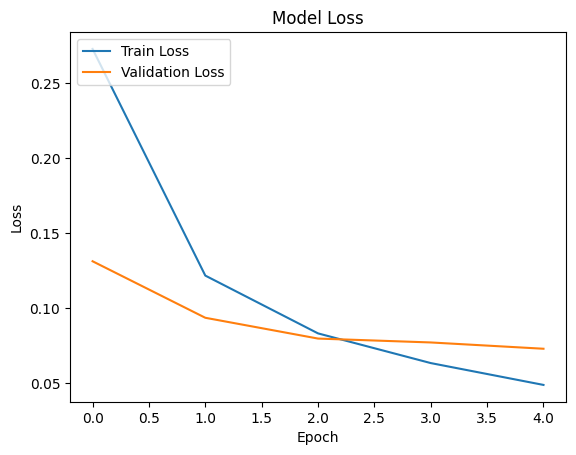

In [40]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')
plt.show()

313/313 [==============================] - 0s 2ms/step


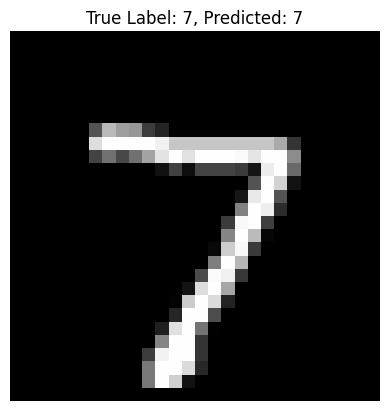

In [42]:
# Make predictions on the test data
predictions = model.predict(x_test)

# Function to plot an image and the predicted label
def plot_prediction(image, true_label, prediction):
    plt.imshow(image, cmap='gray')
    plt.title(f"True Label: {true_label}, Predicted: {np.argmax(prediction)}")
    plt.axis('off')
    plt.show()

# Plot the first 1 test images and their predictions
for i in range(1):
    plot_prediction(x_test[i], y_test[i], predictions[i])

In [ ]:
# Save the model
model.save('mnist_model.h5')